# Income Inequality Analysis
Exploring World Bank data on income distribution and inequality metrics

## 1. Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

## 2. Load and Prepare Data

In [5]:
df = pd.read_csv('input/raw/WDICSV.csv')
df.sample(100).to_csv('input/raw/sample.csv', index=False)

## 3. Explore Available Indicators
- Moved to lookup notebook

In [6]:
# code_name = df['Indicator Code'] + ' - ' + df['Indicator Name']

# for cn in code_name.unique():
#     print(cn)
    
# print(f"# of features: {len(code_name.unique())}")

## 4. Extract Income Distribution Data

In [7]:
df_top10_income_share = df[df['Indicator Code'] == 'SI.DST.10TH.10']
df_bottom10_income_share = df[df['Indicator Code'] == 'SI.DST.FRST.10']
years = df_top10_income_share.columns[4:]

## 5. Visualize Income Share Trends

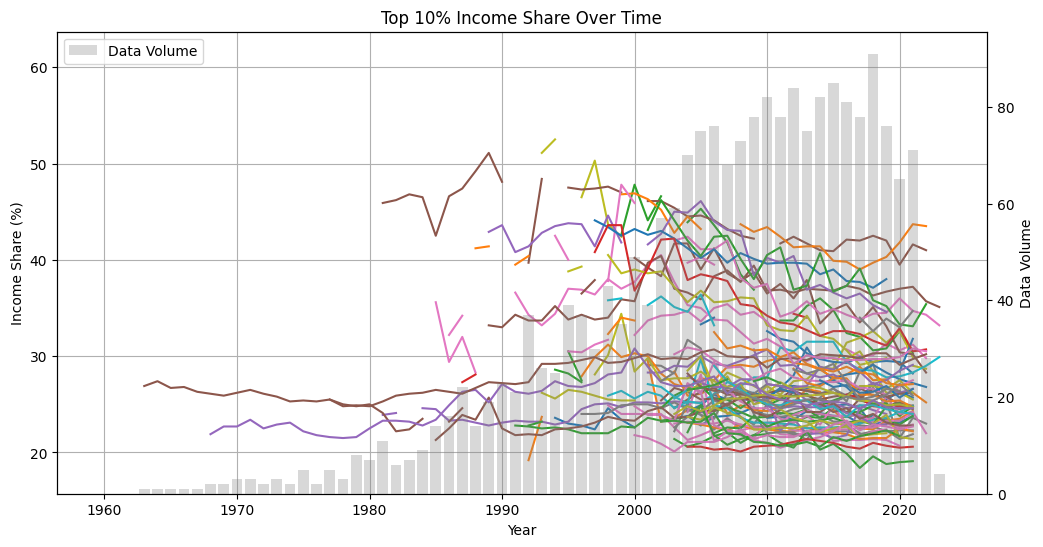

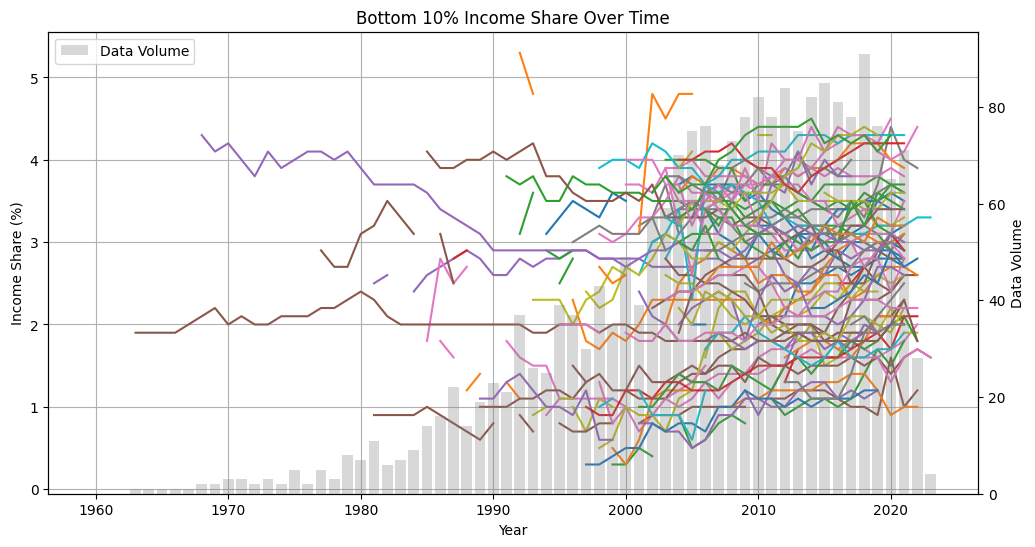

In [8]:
# Plot the line chart for top 10% income share
fig1, ax1 = plt.subplots(figsize=(12, 6))
df_top10_income_share.set_index('Country Code')[years].T.plot(
    title='Top 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Income Share (%)',
    legend=False,
    grid=True,
    ax=ax1
)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()
data_volume = df_top10_income_share[years].count()
ax2.bar(years, data_volume, alpha=0.3, color='gray', label='Data Volume')
ax2.set_ylabel('Data Volume')
ax2.legend(loc='upper left')

plt.show()

# Plot the line chart for bottom 10% income share
fig2, ax3 = plt.subplots(figsize=(12, 6))
df_bottom10_income_share.set_index('Country Code')[years].T.plot(
    title='Bottom 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Income Share (%)',
    legend=False,
    grid=True,
    ax=ax3
)

# Create a secondary y-axis for the histogram
ax4 = ax3.twinx()
data_volume = df_bottom10_income_share[years].count()
ax4.bar(years, data_volume, alpha=0.3, color='gray', label='Data Volume')
ax4.set_ylabel('Data Volume')
ax4.legend(loc='upper left')

plt.show()


## 6. Calculate and Visualize Mean Income Share

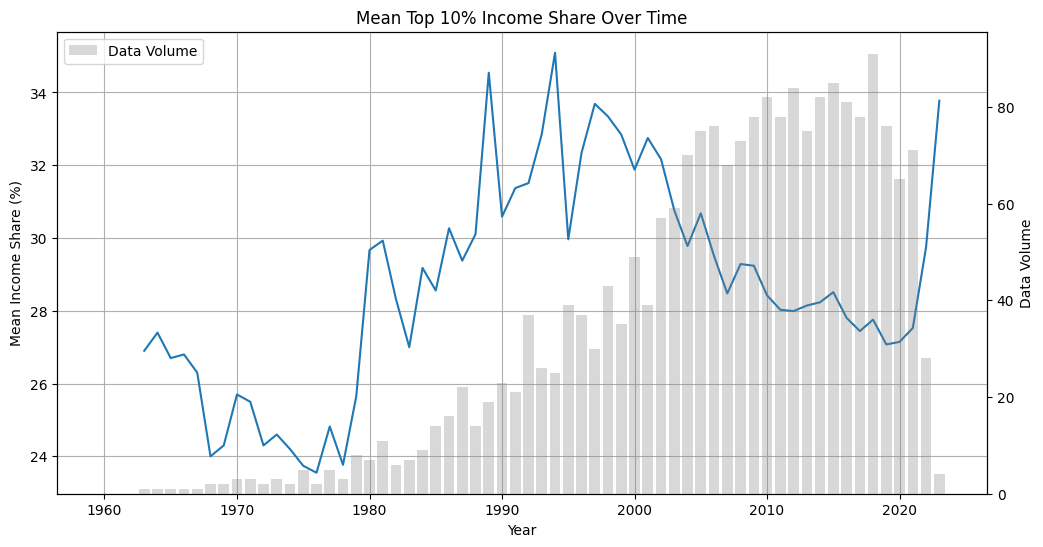

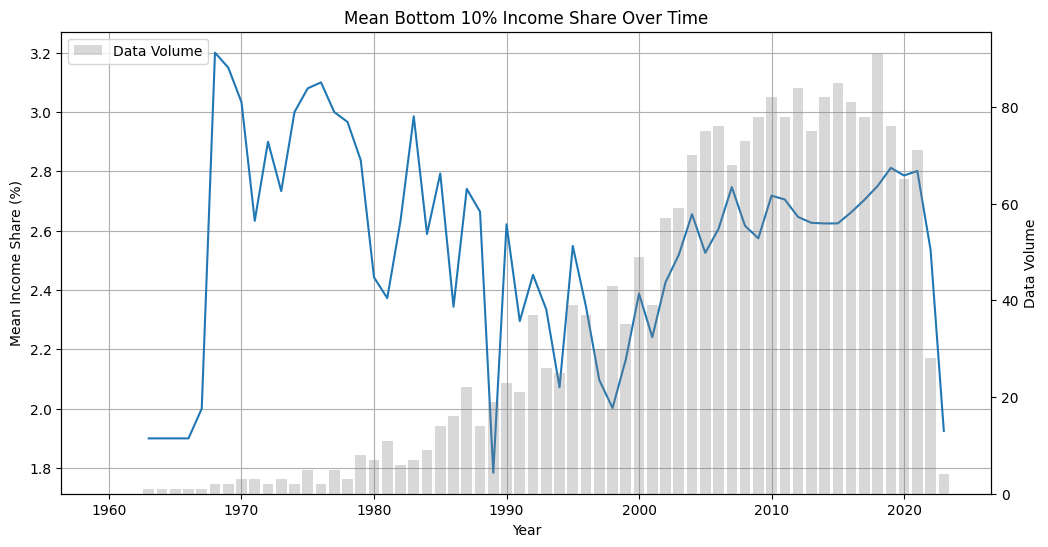

In [9]:
# Calculate the mean over time for top 10% income share
mean_top10 = df_top10_income_share[years].mean()

# Plot the mean over time for top 10% income share
fig1, ax1 = plt.subplots(figsize=(12, 6))
mean_top10.plot(
    title='Mean Top 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Mean Income Share (%)',
    grid=True,
    ax=ax1
)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()
data_volume_top10 = df_top10_income_share[years].count()
ax2.bar(years, data_volume_top10, alpha=0.3, color='gray', label='Data Volume')
ax2.set_ylabel('Data Volume')
ax2.legend(loc='upper left')

plt.show()

# Calculate the mean over time for bottom 10% income share
mean_bottom10 = df_bottom10_income_share[years].mean()

# Plot the mean over time for bottom 10% income share
fig2, ax3 = plt.subplots(figsize=(12, 6))
mean_bottom10.plot(
    title='Mean Bottom 10% Income Share Over Time',
    xlabel='Year',
    ylabel='Mean Income Share (%)',
    grid=True,
    ax=ax3
)

# Create a secondary y-axis for the histogram
ax4 = ax3.twinx()
data_volume_bottom10 = df_bottom10_income_share[years].count()
ax4.bar(years, data_volume_bottom10, alpha=0.3, color='gray', label='Data Volume')
ax4.set_ylabel('Data Volume')
ax4.legend(loc='upper left')

plt.show()


## 7. Data Transformation for Analysis

In [10]:
df_long = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                  var_name="Year", value_name="Value")

df_wide = df_long.pivot_table(index=["Country Name", "Country Code", "Year"],
                              columns="Indicator Code", values="Value")

df_wide = df_wide.reset_index()

df_wide

Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,0.143791,377500.0,57.878356,7650000.0,0.830251,11.728991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,0.142857,378000.0,57.955016,7700000.0,0.818765,11.805651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,0.141935,378500.0,58.031676,7750000.0,0.806915,11.882311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,0.141026,379050.0,58.116002,7800000.0,0.794757,11.958972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955,Zimbabwe,ZWE,2019,623.474178,42.386111,162000.0,39.518358,4000000.0,0.261928,8.099009,...,18.893734,14.565084,15.862261,5.703138,4.807448,1.800944,5.747923,2.041201,4.674356,9.559706
16956,Zimbabwe,ZWE,2020,212.474438,32.278234,162000.0,39.754073,4000000.0,0.257618,8.320764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16957,Zimbabwe,ZWE,2021,212.474438,33.771180,162000.0,39.385906,4000000.0,0.253209,7.952922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16958,Zimbabwe,ZWE,2022,212.474438,33.330587,NaN,39.489284,NaN,NaN,8.058050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. Feature Selection

In [11]:
# Define target indicators for top and bottom 10% wealth share
target_top = "SI.DST.10TH.10"   # Top 10% wealth share
target_bottom = "SI.DST.FRST.10" # Bottom 10% wealth share

# Exclude identifier columns and target columns from features
exclude_columns = ["Country Name", "Country Code", "Year", target_top, target_bottom]
feature_columns = [col for col in df_wide.columns if col not in exclude_columns]

# Feature matrix and target series
X = df_wide[feature_columns]
y_top = df_wide[target_top]
y_bottom = df_wide[target_bottom]

## 9. Handle Missing Values

In [12]:
for col in feature_columns:
    if df_wide[col].isna().any():
        df_wide[col].fillna(df_wide[col].mean(), inplace=True)
X = df_wide[feature_columns]
y_top = df_wide[target_top]
y_bottom = df_wide[target_bottom]

/var/folders/cj/3zyd4jkj3s1f2bnvnnc629300000gn/T/ipykernel_82653/383532579.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wide[col].fillna(df_wide[col].mean(), inplace=True)


## 10. Principal Component Analysis (PCA)

In [13]:
# pca

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variables to the PCA DataFrame
pca_df[target_top] = y_top
pca_df[target_bottom] = y_bottom

# Add the Country Name to pca_df for hover data
pca_df['Country Name'] = df_wide['Country Name']

# Filter out rows with NaN values in the color column
pca_df_filtered = pca_df.dropna(subset=[target_top])

# Plot PCA results using Plotly Express
fig = px.scatter(
    pca_df_filtered,
    x='Principal Component 1',
    y='Principal Component 2',
    color=target_top,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='PCA of Wealth Share Indicators',
    labels={
        'Principal Component 1': 'Principal Component 1',
        'Principal Component 2': 'Principal Component 2',
        target_top: target_top
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=target_top))
os.makedirs('output/pca', exist_ok=True)
fig.write_html('output/pca/pca_plot_top10.html', include_plotlyjs='cdn')
fig.show()

## 11. t-SNE Analysis

In [14]:
#TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add the target variables to the t-SNE DataFrame
tsne_df[target_top] = y_top
tsne_df[target_bottom] = y_bottom
tsne_df['Country Name'] = df_wide['Country Name']

## 12. Visualize t-SNE Results with Bottom 10% Income Share

In [15]:
color_column = target_bottom

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
# tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_bottom10.html', include_plotlyjs='cdn')
fig.show()

## 13. Visualize t-SNE Results with Top 10% Income Share

In [16]:
color_column = target_top

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
# tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_top10.html', include_plotlyjs='cdn')
fig.show()

## 14. Group Data by Country (Last Record) - Bottom 10% Income Share

In [17]:
color_column = target_bottom

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators (Filtered)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_bottom10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()

## 15. Group Data by Country (Last Record) - Top 10% Income Share

In [18]:
color_column = target_top

# Filter out rows with NaN values in the color_column, optionally group by 'Country Name'
# to get the last entry for each country
tsne_df_filtered = tsne_df.dropna(subset=[color_column])
tsne_df_filtered = tsne_df_filtered.groupby('Country Name').last().reset_index()

# Plot the filtered data
fig = px.scatter(
    tsne_df_filtered,
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    color=color_column,
    color_continuous_scale='viridis',
    opacity=0.5,
    hover_data=['Country Name'],
    title='t-SNE of Wealth Share Indicators (Filtered)',
    labels={
        't-SNE Component 1': 't-SNE Component 1',
        't-SNE Component 2': 't-SNE Component 2',
        color_column: color_column
    }
)
fig.update_traces(marker=dict(size=8))
fig.update_layout(coloraxis_colorbar=dict(title=color_column))
os.makedirs('output/tsne', exist_ok=True)
fig.write_html('output/tsne/tsne_plot_top10_last_record_by_country.html', include_plotlyjs='cdn')
fig.show()